In [1]:
import pandas as pd
import numpy as np



In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\Divija\Downloads\archive\netflix_titles.csv', encoding='latin1')


# Display basic info
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Check null values
df.isnull().sum()

# Drop rows with too many missing values or fill them
df['director'].fillna("Not Available", inplace=True)
df['cast'].fillna("Not Available", inplace=True)
df['country'].fillna("Not Specified", inplace=True)
df['date_added'].fillna(method='ffill', inplace=True)
df['rating'].fillna("Not Rated", inplace=True)

# Confirm
df.isnull().sum()


C:\Users\Divija\AppData\Local\Temp\ipykernel_12960\2294908711.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna("Not Available", inplace=True)
C:\Users\Divija\AppData\Local\Temp\ipykernel_12960\2294908711.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64

In [9]:
# Convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


# Create new columns
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month



C:\Users\Divija\AppData\Local\Temp\ipykernel_12960\2732858358.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


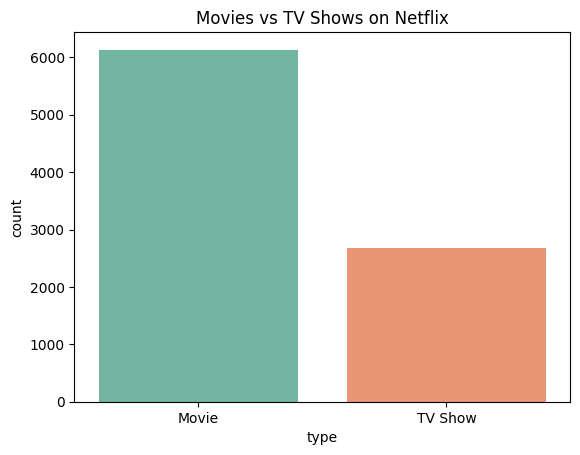

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='type', palette='Set2')
plt.title("Movies vs TV Shows on Netflix")
plt.show()


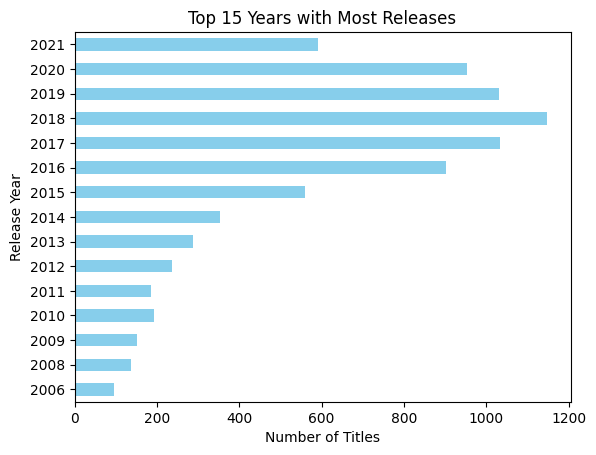

In [11]:
df_year = df['release_year'].value_counts().head(15).sort_index()

df_year.plot(kind='barh', color='skyblue')
plt.title("Top 15 Years with Most Releases")
plt.xlabel("Number of Titles")
plt.ylabel("Release Year")
plt.show()


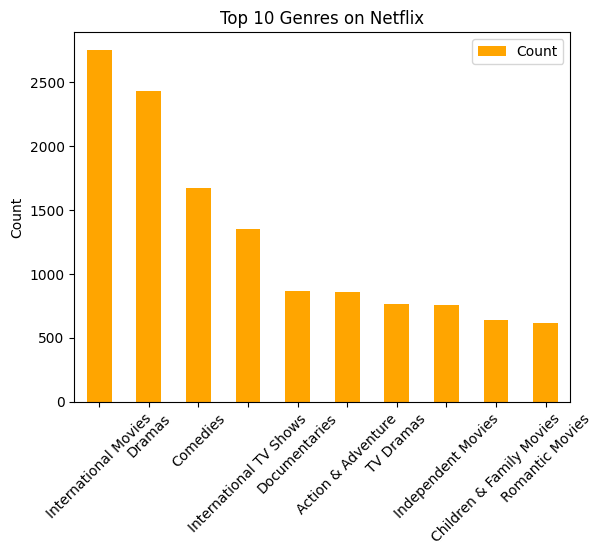

In [17]:
# Split multiple genres
from collections import Counter

genre_counter = Counter()
for genre_list in df['listed_in']:
    for genre in genre_list.split(', '):
        genre_counter[genre] += 1

# Plot
genre_df = pd.DataFrame.from_dict(genre_counter, orient='index', columns=['Count'])
genre_df.sort_values(by='Count', ascending=False).head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Genres on Netflix")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


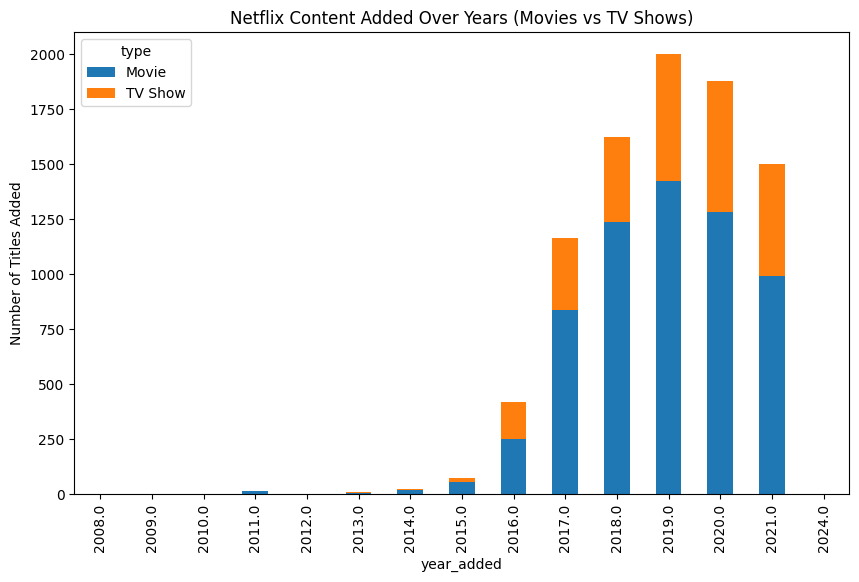

In [18]:
df_temp = df.groupby(['year_added', 'type']).size().unstack().fillna(0)
df_temp.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Netflix Content Added Over Years (Movies vs TV Shows)")
plt.ylabel("Number of Titles Added")
plt.show()


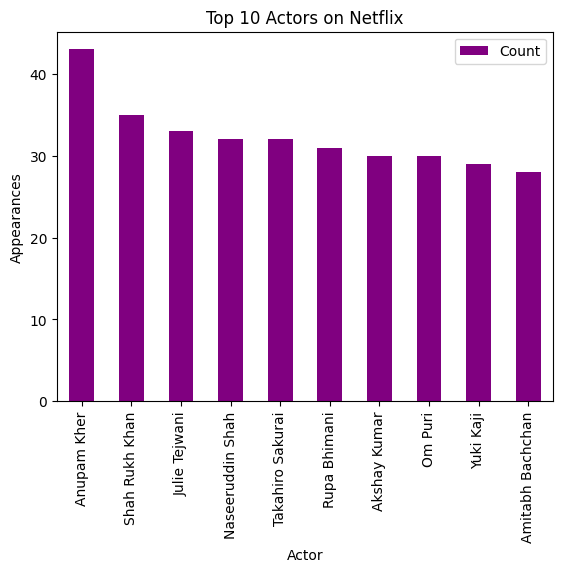

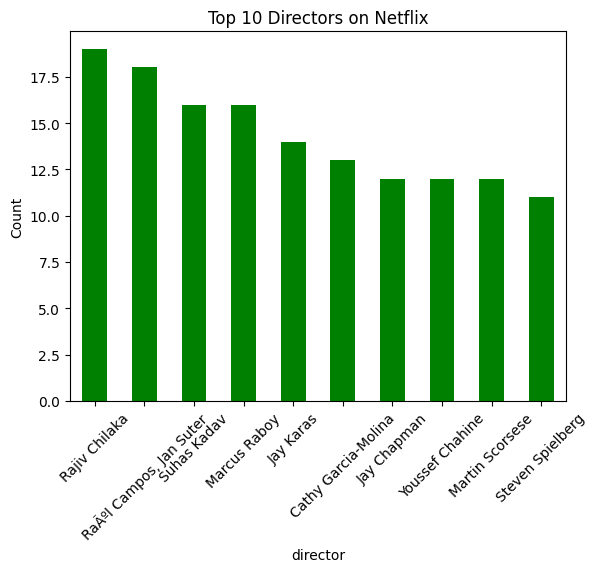

In [19]:
# Top 10 Actors
actor_counter = Counter()
for cast_list in df['cast'].dropna():
    for actor in cast_list.split(', '):
        actor_counter[actor] += 1

pd.DataFrame(actor_counter.most_common(10), columns=['Actor', 'Count']).set_index('Actor').plot(kind='bar', color='purple')
plt.title("Top 10 Actors on Netflix")
plt.ylabel("Appearances")
plt.show()

# Top 10 Directors
top_directors = df[df['director'] != "Not Available"]['director'].value_counts().head(10)
top_directors.plot(kind='bar', color='green')
plt.title("Top 10 Directors on Netflix")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
